In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
filepath = 'E:/Research/Kaggle/Datasets/Global Ecological Footprint 2023.csv'

data = pd.read_csv(filepath, encoding='latin-1')

print(data.dtypes)
print(data.shape)

Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                               object
HDI                                          object
Per Capita GDP                               object
Income Group                                 object
Population (millions)                        object
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Carbon Footprint                            float64
Fish Footprint                              float64
Built up land                               float64
Total Ecological Footprint (Consumption)    float64
Cropland                                    float64
Grazing land                                float64
Forest land                                 float64
Fishing ground                              float64
Built up lan

In [3]:
# Rename the columns 
data.rename(columns={'Total biocapacity ': 'Total biocapacity'}, inplace=True)
data.rename(columns={'Life Exectancy': 'Life Expectancy'}, inplace=True)

# Removing '$' and ',' to convert'Per Capita GDP' to a numeric column 
data['Per Capita GDP'] = data['Per Capita GDP'].str.replace('$', '')
data['Per Capita GDP'] = data['Per Capita GDP'].str.replace(',', '')
data['Per Capita GDP']

# Convert non-numeric columns to numeric
columns_to_convert = ['SDGi', 'Life Expectancy', 'HDI', 'Population (millions)', 'Per Capita GDP']

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [4]:
missing_values_count = data.isna().sum()

missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

print(missing_values_count_sorted)

Fish Footprint                              30
Grazing Footprint                           30
Fishing ground                              30
Forest land                                 30
Grazing land                                30
Cropland                                    30
Built up land                               30
Carbon Footprint                            30
Forest Product Footprint                    30
Cropland Footprint                          30
Built up land.1                             30
SDGi                                        24
Per Capita GDP                              19
HDI                                         11
Life Expectancy                              7
Income Group                                 4
Population (millions)                        2
Total biocapacity                            1
Number of Earths required                    1
Ecological (Deficit) or Reserve              1
Number of Countries required                 1
Total Ecologi

In [5]:
missing_values_per_row = data.isnull().sum(axis=1)

missing_values_df = pd.DataFrame({'Row': missing_values_per_row.index, 'Missing Values': missing_values_per_row.values})

missing_values_df['Country'] = data['Country']
missing_values_df= missing_values_df[missing_values_df['Missing Values']>0]

sorted_missing_values_df = missing_values_df.sort_values(by='Missing Values', ascending=False)
print("Countries with most amount of missing data:")
print(sorted_missing_values_df)

Countries with most amount of missing data:
     Row  Missing Values                                 Country
17    17              19                                 Bermuda
60    60              16                           French Guiana
105  105              16                              Martinique
134  134              16                                 Réunion
69    69              16                              Guadeloupe
61    61              14                        French Polynesia
36    36              12                                 Comoros
170  170              12                                 Ukraine
47    47              12                                Dominica
27    27              12                              Cabo Verde
139  139              12            Saint Vincent and Grenadines
68    68              12                                 Grenada
4      4              12                     Antigua and Barbuda
107  107              11                      

In [6]:
sorted_missing_values_df = sorted_missing_values_df.loc[sorted_missing_values_df['Missing Values']>=11]

sorted_missing_values_df

,Row,Missing Values,Country
17,17,19,Bermuda
60,60,16,French Guiana
105,105,16,Martinique
134,134,16,Réunion
69,69,16,Guadeloupe
61,61,14,French Polynesia
36,36,12,Comoros
170,170,12,Ukraine
47,47,12,Dominica
27,27,12,Cabo Verde


In [7]:
dropped_countries = sorted_missing_values_df['Country'].values.tolist()

culled_data = data.copy()

rows_to_drop = culled_data.apply(lambda row: row.isin(dropped_countries).any(), axis=1)

culled_data = culled_data.drop(index=culled_data[rows_to_drop].index)

print('shape of culled data:',culled_data.shape)

shape of culled data: (152, 24)


In [8]:
from sklearn.impute import KNNImputer
# Let us imput the rest of the columns 
columns_to_impute = culled_data.columns[culled_data.isnull().any()].tolist()
# Initialize the KNN imputer with k=5 (5 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the data
culled_data[columns_to_impute] = imputer.fit_transform(culled_data[columns_to_impute])

missing_values_count = culled_data.isna().sum()

missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

print(missing_values_count_sorted)

Country                                     0
Region                                      0
Number of Earths required                   0
Ecological (Deficit) or Reserve             0
Total biocapacity                           0
Built up land.1                             0
Fishing ground                              0
Forest land                                 0
Grazing land                                0
Cropland                                    0
Total Ecological Footprint (Consumption)    0
Built up land                               0
Fish Footprint                              0
Carbon Footprint                            0
Forest Product Footprint                    0
Grazing Footprint                           0
Cropland Footprint                          0
Population (millions)                       0
Income Group                                0
Per Capita GDP                              0
HDI                                         0
Life Expectancy                   

In [9]:
culled_data.describe()

,SDGi,Life Expectancy,HDI,Per Capita GDP,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,66.296316,70.851316,0.714316,21512.334211,31.838553,0.582895,0.270395,0.428289,1.533553,0.146053,...,3.048026,0.510526,0.402632,1.523629,0.431970,0.088023,2.962998,-0.084771,2.018103,2.767747
std,11.486051,7.739894,0.157319,22642.809968,52.293496,0.345218,0.431513,0.565968,1.771703,0.434274,...,2.326153,0.543372,0.858842,5.786458,0.907075,0.086141,6.622550,6.686007,1.540945,5.175730
min,0.000000,53.000000,0.390000,733.000000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104127,-12.087339,0.366855,0.041945
25%,59.375000,64.750000,0.587500,4950.750000,4.975000,0.300000,0.100000,0.200000,0.300000,0.000000,...,1.200000,0.200000,0.100000,0.070767,0.017074,0.038711,0.677154,-1.787555,0.776874,0.813477
50%,67.900000,72.000000,0.730000,14715.500000,11.450000,0.500000,0.200000,0.200000,0.900000,0.100000,...,2.300000,0.300000,0.100000,0.315186,0.102650,0.065621,1.386204,-0.498462,1.538250,1.740634
75%,73.550000,76.000000,0.840000,31097.000000,34.550000,0.800000,0.300000,0.500000,2.200000,0.100000,...,4.200000,0.600000,0.300000,1.182957,0.292881,0.110695,2.734813,0.322828,2.754213,2.517007
max,86.500000,84.000000,0.960000,120505.000000,334.800000,1.900000,4.700000,4.300000,11.600000,5.100000,...,13.100000,2.800000,6.800000,67.949961,6.479269,0.541117,74.838452,71.699357,8.691697,55.106187


In [10]:
numerical_df = culled_data.select_dtypes(include='number')

correlation_matrix = numerical_df.corr()

correlation_matrix.style.background_gradient(cmap='coolwarm')

,SDGi,Life Expectancy,HDI,Per Capita GDP,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
SDGi,1.000000,0.750866,0.796509,0.578056,0.027510,0.554678,-0.018670,0.347051,0.430307,0.095796,0.304499,0.518648,0.394297,-0.071934,0.089564,0.200790,0.263884,0.133129,-0.049040,0.519748,0.119792
Life Expectancy,0.750866,1.000000,0.910234,0.745572,-0.032314,0.512792,0.004067,0.230066,0.616062,0.134177,0.319526,0.634645,0.248732,-0.076534,0.017966,0.152945,0.266355,0.050996,-0.170690,0.635522,0.327234
HDI,0.796509,0.910234,1.000000,0.791190,-0.002321,0.600486,0.049150,0.317303,0.676772,0.130531,0.359345,0.725892,0.373360,-0.008388,0.067319,0.228591,0.311132,0.124282,-0.129681,0.726255,0.282087
Per Capita GDP,0.578056,0.745572,0.791190,1.000000,-0.027842,0.513001,0.034698,0.271269,0.815609,0.088777,0.263116,0.793212,0.208181,-0.069289,0.006924,0.209546,0.238397,0.046489,-0.230169,0.793579,0.494457
Population (millions),0.027510,-0.032314,-0.002321,-0.027842,1.000000,-0.022760,-0.120991,-0.117568,-0.036436,-0.062934,-0.056569,-0.093419,0.090834,-0.103217,-0.061183,-0.132798,-0.087314,-0.079025,-0.045688,-0.093624,-0.062934
Cropland Footprint,0.554678,0.512792,0.600486,0.513001,-0.022760,1.000000,0.032588,0.456688,0.404387,0.032235,0.315507,0.590436,0.647748,-0.148609,-0.001156,0.125692,0.300815,0.055120,-0.150909,0.590425,0.075092
Grazing Footprint,-0.018670,0.004067,0.049150,0.034698,-0.120991,0.032588,1.000000,-0.017699,0.092176,-0.017414,-0.029695,0.254908,0.040598,0.738942,0.062632,0.022991,-0.023282,0.156789,0.067073,0.253481,-0.016599
Forest Product Footprint,0.347051,0.230066,0.317303,0.271269,-0.117568,0.456688,-0.017699,1.000000,0.164886,-0.004527,0.203569,0.438105,0.484197,-0.030264,0.194678,0.429915,0.219914,0.268876,0.113673,0.438571,-0.117417
Carbon Footprint,0.430307,0.616062,0.676772,0.815609,-0.036436,0.404387,0.092176,0.164886,1.000000,0.142409,0.224924,0.911372,0.154274,-0.042929,0.018075,0.199507,0.237543,0.054011,-0.263769,0.911521,0.443363
Fish Footprint,0.095796,0.134177,0.130531,0.088777,-0.062934,0.032235,-0.017414,-0.004527,0.142409,1.000000,0.047348,0.291952,0.001019,-0.082715,0.006500,0.109981,0.040918,0.010026,-0.092072,0.293056,0.086806


In [12]:
for column in numerical_df:
    print(column)

SDGi
Life Expectancy
HDI
Per Capita GDP
Population (millions)
Cropland Footprint
Grazing Footprint
Forest Product Footprint
Carbon Footprint
Fish Footprint
Built up land
Total Ecological Footprint (Consumption)
Cropland
Grazing land
Forest land
Fishing ground
Built up land.1
Total biocapacity
Ecological (Deficit) or Reserve
Number of Earths required
Number of Countries required


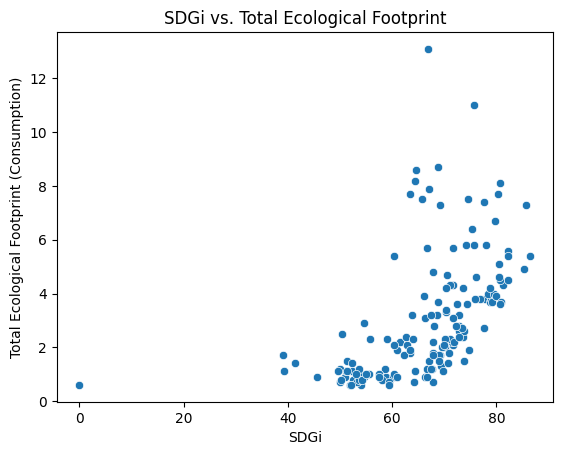

Correlation between SDGi and Total Ecological Footprint: 0.5186483216051647


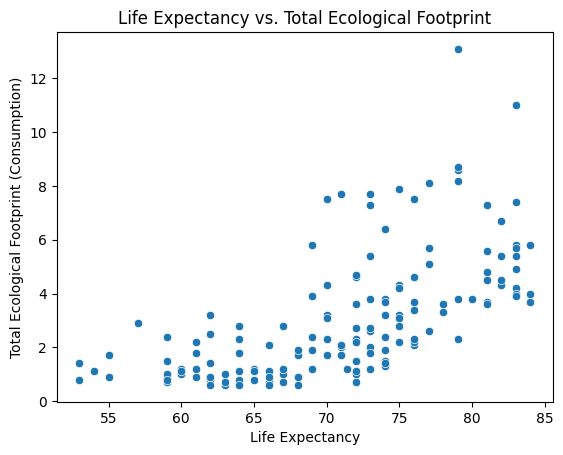

Correlation between Life Expectancy and Total Ecological Footprint: 0.6346448809514803


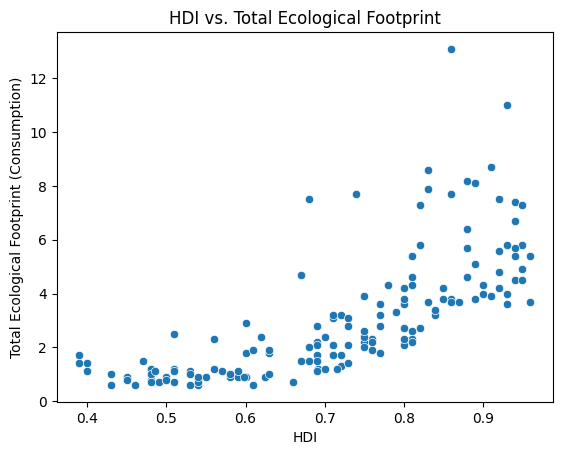

Correlation between HDI and Total Ecological Footprint: 0.7258920891346565


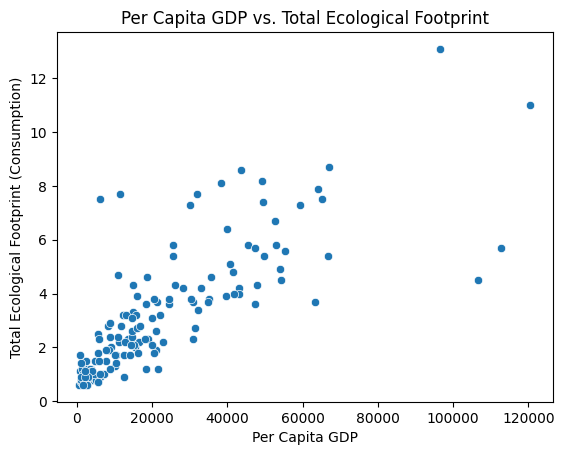

Correlation between Per Capita GDP and Total Ecological Footprint: 0.793212008110745


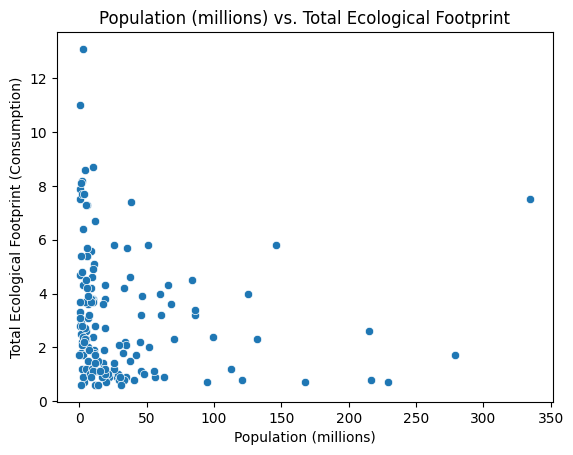

Correlation between Population (millions) and Total Ecological Footprint: -0.09341915827577417


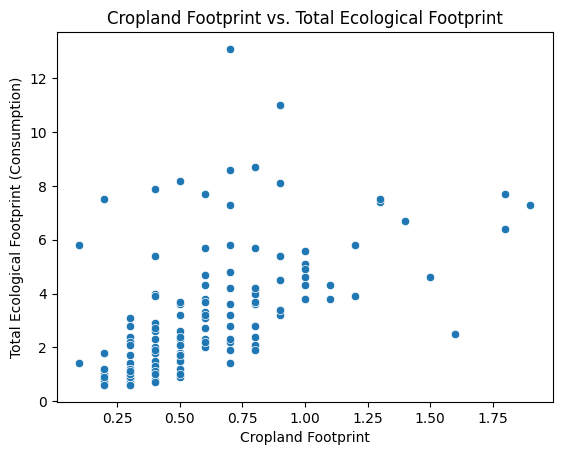

Correlation between Cropland Footprint and Total Ecological Footprint: 0.5904359617990173


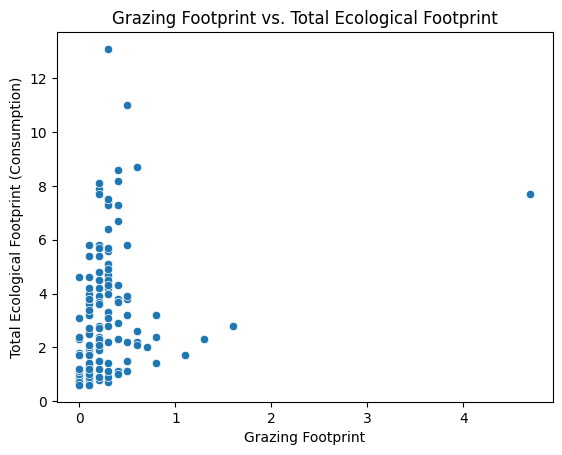

Correlation between Grazing Footprint and Total Ecological Footprint: 0.25490825977429726


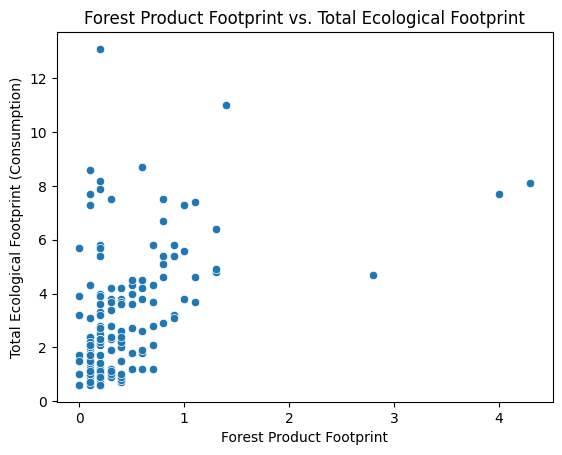

Correlation between Forest Product Footprint and Total Ecological Footprint: 0.43810499101104644


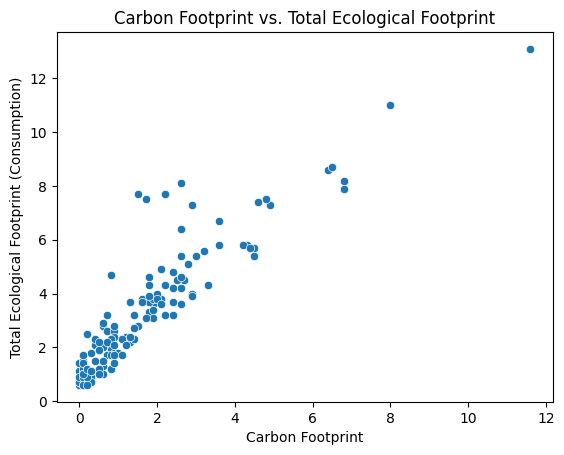

Correlation between Carbon Footprint and Total Ecological Footprint: 0.911371623221499


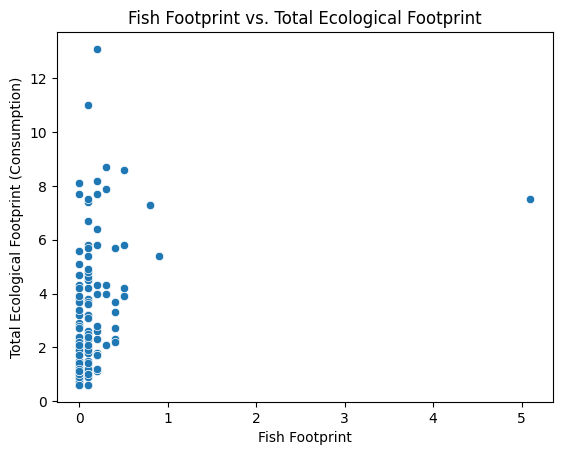

Correlation between Fish Footprint and Total Ecological Footprint: 0.2919518000694909


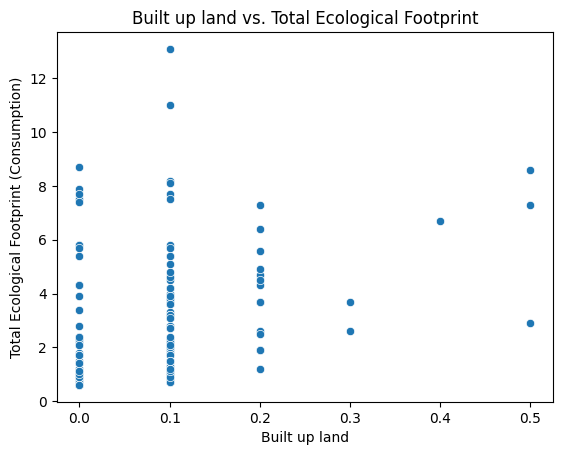

Correlation between Built up land and Total Ecological Footprint: 0.3108062364725357


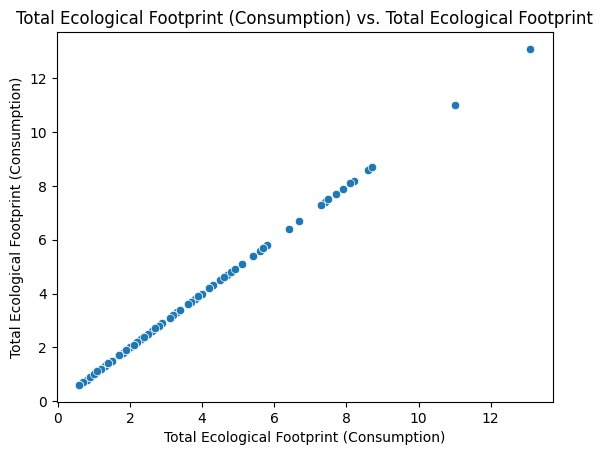

Correlation between Total Ecological Footprint (Consumption) and Total Ecological Footprint: 1.0


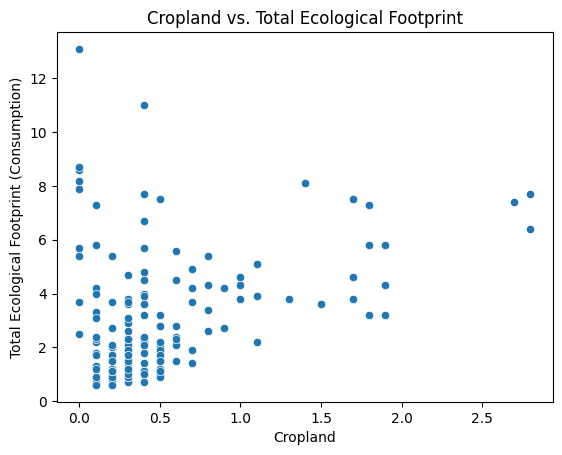

Correlation between Cropland and Total Ecological Footprint: 0.3396917072582512


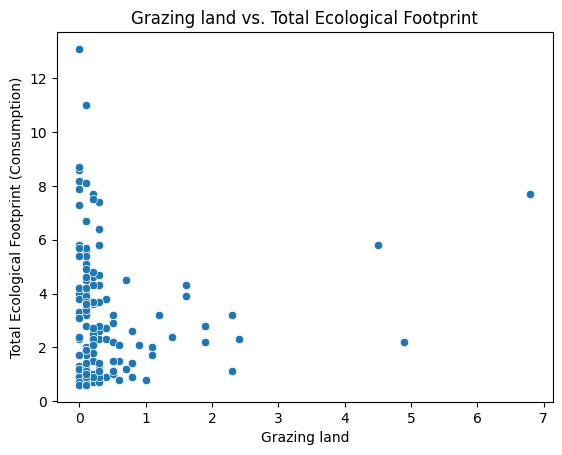

Correlation between Grazing land and Total Ecological Footprint: 0.05807982501342555


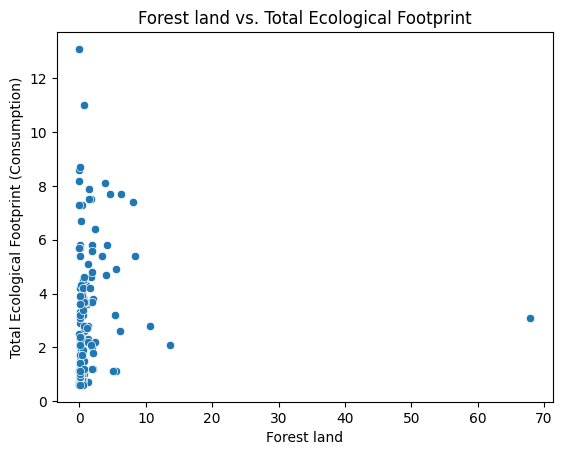

Correlation between Forest land and Total Ecological Footprint: 0.07561244969637122


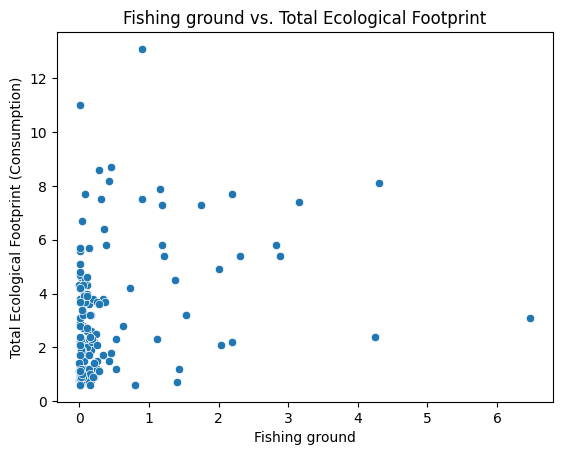

Correlation between Fishing ground and Total Ecological Footprint: 0.29979757613425606


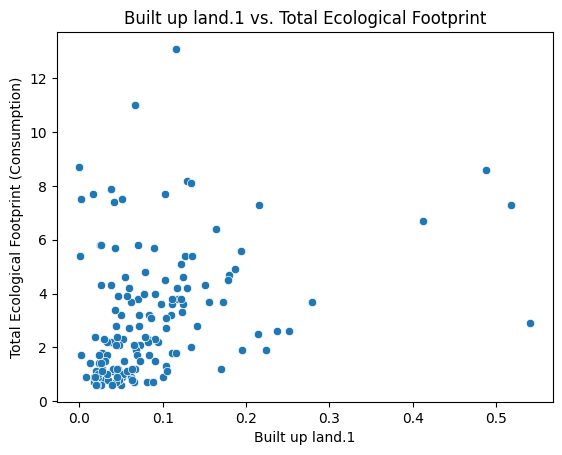

Correlation between Built up land.1 and Total Ecological Footprint: 0.3235256764277629


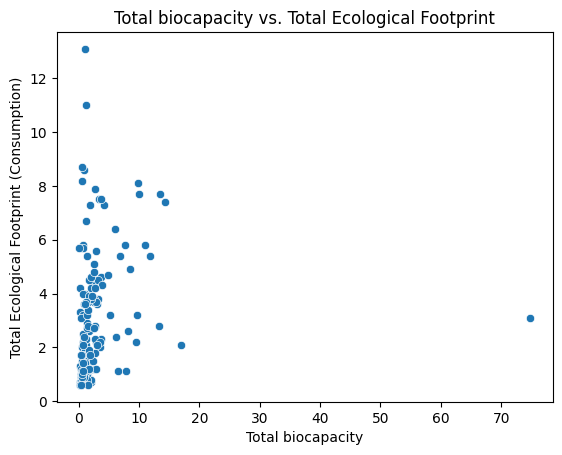

Correlation between Total biocapacity and Total Ecological Footprint: 0.1476687990969917


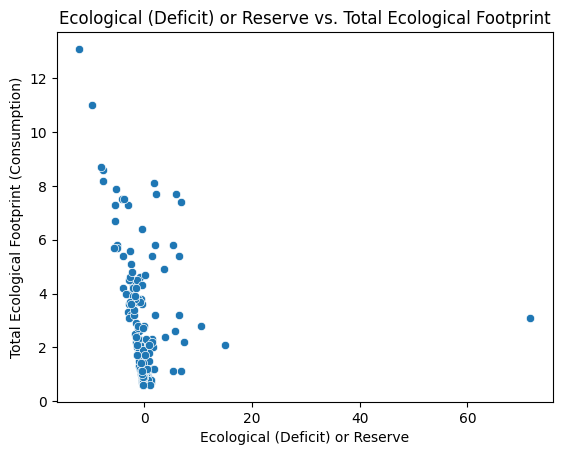

Correlation between Ecological (Deficit) or Reserve and Total Ecological Footprint: -0.20177012117778262


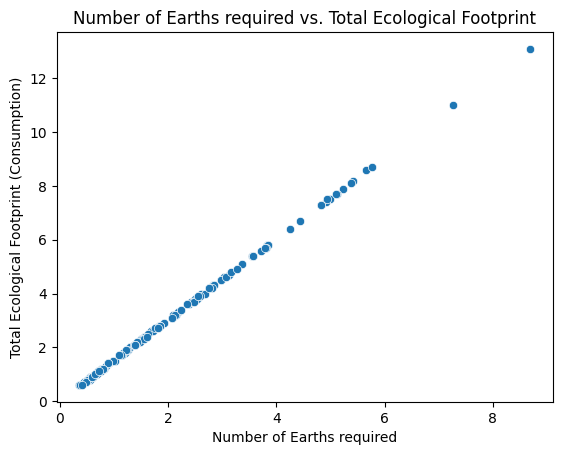

Correlation between Number of Earths required and Total Ecological Footprint: 0.9999231905807264


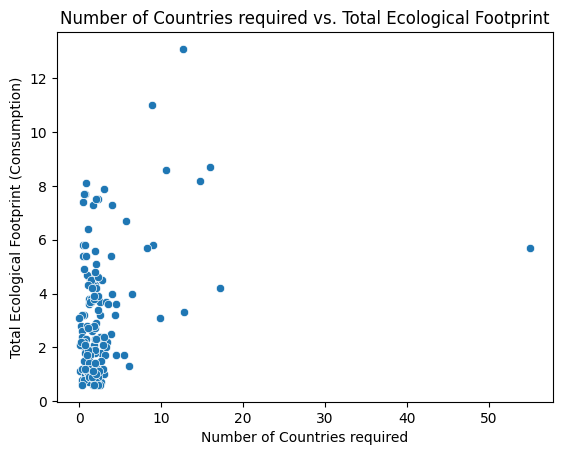

Correlation between Number of Countries required and Total Ecological Footprint: 0.3318300110103815


In [13]:
for column in numerical_df:
    plt.figure()
    sns.scatterplot(data=culled_data, x=str(column), y='Total Ecological Footprint (Consumption)')
    plt.title('{column} vs. Total Ecological Footprint'.format(column=column))
    plt.show()
    
    correlation = culled_data[str(column)].corr(culled_data['Total Ecological Footprint (Consumption)'])
    print(f"Correlation between {column} and Total Ecological Footprint: {correlation}".format(column=column))

In [16]:
import streamlit as st

st.write('Hello? Is this thing on?')

st run your_script.py [-- script args]

SyntaxError: invalid syntax (2909019782.py, line 5)